In [58]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow as tf

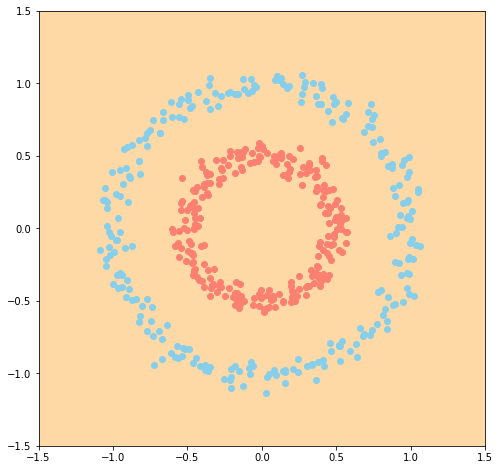

In [59]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

res = 100

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)
_pY = np.zeros((res,res)) + 0.5

plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap='Pastel1', vmin=0, vmax=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c = 'salmon')

In [60]:
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01
nn = [2, 16, 8, 1]

In [61]:
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))


W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))


W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

In [62]:
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

In [63]:
loss = tf.losses.mean_squared_error(pY, iY)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000

iPY = []

In [65]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_steps):
        
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX:X, iY:Y})
        
        if step%25 == 0:
            
            acc = np.mean(np.round(_pY) == Y)
            
            print('Step ', step , '/ ', n_steps, ' - loss', _loss, ' - acc', acc)
            
            _pY = sess.run(pY, feed_dict={iX:_pX}).reshape((res, res))
            
            iPY.append(_pY)

Step  0 /  1000  - loss 0.4475815  - acc 0.498
Step  25 /  1000  - loss 0.3717567  - acc 0.602
Step  50 /  1000  - loss 0.3529674  - acc 0.63
Step  75 /  1000  - loss 0.33846247  - acc 0.636
Step  100 /  1000  - loss 0.31843448  - acc 0.658
Step  125 /  1000  - loss 0.2740511  - acc 0.704
Step  150 /  1000  - loss 0.2459141  - acc 0.756
Step  175 /  1000  - loss 0.23129569  - acc 0.784
Step  200 /  1000  - loss 0.22062802  - acc 0.802
Step  225 /  1000  - loss 0.21087861  - acc 0.814
Step  250 /  1000  - loss 0.19576631  - acc 0.82
Step  275 /  1000  - loss 0.16699128  - acc 0.844
Step  300 /  1000  - loss 0.041379116  - acc 0.996
Step  325 /  1000  - loss 0.026139133  - acc 1.0
Step  350 /  1000  - loss 0.02220705  - acc 1.0
Step  375 /  1000  - loss 0.01960293  - acc 1.0
Step  400 /  1000  - loss 0.017629161  - acc 1.0
Step  425 /  1000  - loss 0.016035898  - acc 1.0
Step  450 /  1000  - loss 0.014709397  - acc 1.0
Step  475 /  1000  - loss 0.013591412  - acc 1.0
Step  500 /  1000  -